# 0. 사전 준비

In [ ]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AvgPool2D, Flatten,Dense, Dropout,MaxPooling2D
import tensorflow as tf

import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AvgPool2D, Flatten,Dense, Dropout,MaxPooling2D
from tensorflow.keras.models import load_model
import tensorflow as tf

import matplotlib.pyplot as plt

In [ ]:
# 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 데이터 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

11501568/11490434 [==============================] - 0s 0us/step


## LeNet-5 모델

 * 합성곱 신경망(CNN)은 주로 이미지 처리에 많이 쓰이는 형태의 인공신경망 모델이다.
 * LeNet-5는 Yann LeCun 외 4명이 1998년에 발표한 논문 “Gradient-Based Learning Applied to Document Recognition”에서 제시된 합성곱 신경망(CNN) 모델로, 그 중 가장 원조가 되는 모델이다.
 * LeNet-5는 32x32 픽셀 크기의 문자 이미지를 인식하기 위한 모델로서, 숫자 손글씨를 인식하기 위한 모델로서 가장 적합하다고 판단하였다. 

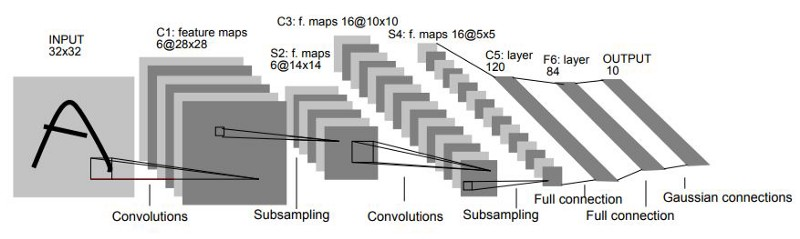

 * 구조를 최대한 차용하되 적용 가능한 형태로 구현
 * 원본은 32x32 사이즈의 이미지를 입력하도록 되어있어 28x28 사이즈를 입력하도록 변경하고, 첫 컨볼루션 레이어에서는 출력되는 이미지 사이즈가 축소되지 않도록 padding을 조정
 * 최적화 함수는 SGD, 손실함수는 sparse_categorical_crossentropy를 적용

In [ ]:
model_lenet5 = Sequential([
    Conv2D(6, (5, 5), activation='tanh', input_shape=(28, 28, 1), padding="same",name="C1"),
    AvgPool2D(2, 2, name="S2"), 
    Conv2D(16, (5, 5), activation='tanh',name="C3"),
    AvgPool2D(2, 2, name="S4"), 
    Conv2D(120, (5, 5), activation='tanh',name="C5"), 
    Flatten(name="Flatten"), 
    Dense(84, activation='tanh',name="F6"), 
    Dense(10, activation='softmax',name="output")
],name="LeNet-5")

model_lenet5.compile(optimizer='SGD', 
                     loss='sparse_categorical_crossentropy', metrics=['accuracy'])
base_hist = model_lenet5.fit(train_images, train_labels, epochs=30,
                             validation_split=0.2)

2022-09-29 05:52:54.288853: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-29 05:52:54.390669: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-29 05:52:54.391483: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-29 05:52:54.393216: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/30


2022-09-29 05:52:59.118718: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1500/1500 [==============================] - 12s 3ms/step - loss: 0.6767 - accuracy: 0.8270 - val_loss: 0.3205 - val_accuracy: 0.9087
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2966 - accuracy: 0.9127 - val_loss: 0.2372 - val_accuracy: 0.9323
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2263 - accuracy: 0.9330 - val_loss: 0.1908 - val_accuracy: 0.9461
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1799 - accuracy: 0.9470 - val_loss: 0.1528 - val_accuracy: 0.9561
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1471 - accuracy: 0.9561 - val_loss: 0.1307 - val_accuracy: 0.9612
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1239 - accuracy: 0.9634 - val_loss: 0.1099 - val_accuracy: 0.9672
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1066 - accuracy: 0.9690 - val_loss: 0.1006 - val_accuracy: 0.9703
Ep

In [ ]:
test_loss, test_acc = model_lenet5.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0369 - accuracy: 0.9878


 ### 활성화 함수를 relu로 변경

In [ ]:
model_lenet5 = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1), padding="same",name="C1"),
    AvgPool2D(2, 2, name="S2"), 
    Conv2D(16, (5, 5), activation='relu',name="C3"),
    AvgPool2D(2, 2, name="S4"), 
    Conv2D(120, (5, 5), activation='relu',name="C5"), 
    Flatten(name="Flatten"), 
    Dense(84, activation='relu',name="F6"), 
    Dense(10, activation='softmax',name="output")
],name="LeNet-5")

model_lenet5.compile(optimizer='SGD', 
                     loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_relu = model_lenet5.fit(train_images, train_labels, epochs=30,
                             validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 1.6097 - accuracy: 0.4628 - val_loss: 0.3588 - val_accuracy: 0.8920
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2908 - accuracy: 0.9143 - val_loss: 0.2193 - val_accuracy: 0.9356
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1790 - accuracy: 0.9461 - val_loss: 0.1483 - val_accuracy: 0.9553
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1323 - accuracy: 0.9595 - val_loss: 0.1263 - val_accuracy: 0.9630
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1057 - accuracy: 0.9686 - val_loss: 0.0934 - val_accuracy: 0.9720
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0905 - accuracy: 0.9725 - val_loss: 0.0917 - val_accuracy: 0.9707
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0790 - accuracy: 0.9755 - val_loss: 0.0853 - val_accuracy:

In [ ]:
test_loss, test_acc = model_lenet5.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0439 - accuracy: 0.9866


 * 성능이 다소 악화됨

 ### 최적화 함수를 adam으로 변경

In [ ]:
model_lenet5 = Sequential([
    Conv2D(6, (5, 5), activation='tanh', input_shape=(28, 28, 1), padding="same",name="C1"),
    AvgPool2D(2, 2, name="S2"), 
    Conv2D(16, (5, 5), activation='tanh',name="C3"),
    AvgPool2D(2, 2, name="S4"), 
    Conv2D(120, (5, 5), activation='tanh',name="C5"), 
    Flatten(name="Flatten"), 
    Dense(84, activation='tanh',name="F6"), 
    Dense(10, activation='softmax',name="output")
],name="LeNet-5")

model_lenet5.compile(optimizer='adam', 
                     loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_adam = model_lenet5.fit(train_images, train_labels, epochs=30,
                             validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2563 - accuracy: 0.9227 - val_loss: 0.1309 - val_accuracy: 0.9600
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1003 - accuracy: 0.9689 - val_loss: 0.0893 - val_accuracy: 0.9744
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0632 - accuracy: 0.9802 - val_loss: 0.0756 - val_accuracy: 0.9784
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0479 - accuracy: 0.9845 - val_loss: 0.0624 - val_accuracy: 0.9809
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0379 - accuracy: 0.9886 - val_loss: 0.0561 - val_accuracy: 0.9838
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0303 - accuracy: 0.9903 - val_loss: 0.0583 - val_accuracy: 0.9831
Epoch 7/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.0535 - val_accuracy:

In [ ]:
test_loss, test_acc = model_lenet5.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0630 - accuracy: 0.9859


 * 성능이 개선되었다고 보기 어려움

 ### 20%의 dropout 적용

In [ ]:
model_lenet5 = Sequential([
    Conv2D(6, (5, 5), activation='tanh', input_shape=(28, 28, 1), padding="same",name="C1"),
     Dropout(0.2),
    AvgPool2D(2, 2, name="S2"), 
    Conv2D(16, (5, 5), activation='tanh',name="C3"),
     Dropout(0.2),
    AvgPool2D(2, 2, name="S4"), 
    Conv2D(120, (5, 5), activation='tanh',name="C5"), 
     Dropout(0.2),
    Flatten(name="Flatten"), 
    Dense(84, activation='tanh',name="F6"), 
    Dropout(0.2),
    Dense(10, activation='softmax',name="output")
],name="LeNet-5")

model_lenet5.compile(optimizer='SGD', 
                     loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_do = model_lenet5.fit(train_images, train_labels, epochs=30,
                             validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7806 - accuracy: 0.7810 - val_loss: 0.3267 - val_accuracy: 0.9062
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3612 - accuracy: 0.8920 - val_loss: 0.2524 - val_accuracy: 0.9264
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2975 - accuracy: 0.9105 - val_loss: 0.2115 - val_accuracy: 0.9368
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2554 - accuracy: 0.9228 - val_loss: 0.1731 - val_accuracy: 0.9477
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2198 - accuracy: 0.9341 - val_loss: 0.1466 - val_accuracy: 0.9556
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1933 - accuracy: 0.9412 - val_loss: 0.1256 - val_accuracy: 0.9625
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1688 - accuracy: 0.9495 - val_loss: 0.1105 - val_accuracy:

In [ ]:
test_loss, test_acc = model_lenet5.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0430 - accuracy: 0.9853


 * 성능이 다소 악화

### 컨볼루션레이어에 배치정규화 적용

In [ ]:
model_lenet5 = Sequential([
    Conv2D(6, (5, 5), input_shape=(28, 28, 1), padding="same",name="C1"),
    layers.BatchNormalization(),
    layers.Activation('tanh'),
    AvgPool2D(2, 2, name="S2"), 
    Conv2D(16, (5, 5),name="C3"),
    layers.BatchNormalization(),
    layers.Activation('tanh'),
    AvgPool2D(2, 2, name="S4"), 
    Conv2D(120, (5, 5),name="C5"), 
    layers.BatchNormalization(),
    layers.Activation('tanh'),
    Flatten(name="Flatten"), 
    Dense(84, activation='tanh',name="F6"), 
    Dense(10, activation='softmax',name="output")
],name="LeNet-5")

model_lenet5.compile(optimizer='SGD', 
                     loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_bn = model_lenet5.fit(train_images, train_labels, epochs=30,
                             validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2350 - accuracy: 0.9413 - val_loss: 0.1029 - val_accuracy: 0.9760
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0860 - accuracy: 0.9776 - val_loss: 0.0632 - val_accuracy: 0.9832
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0639 - accuracy: 0.9827 - val_loss: 0.0571 - val_accuracy: 0.9852
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0549 - accuracy: 0.9844 - val_loss: 0.0452 - val_accuracy: 0.9884
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0471 - accuracy: 0.9868 - val_loss: 0.0597 - val_accuracy: 0.9827
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0423 - accuracy: 0.9880 - val_loss: 0.0782 - val_accuracy: 0.9756
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0391 - accuracy: 0.9884 - val_loss: 0.0409 - val_accuracy:

In [ ]:
test_loss, test_acc = model_lenet5.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0252 - accuracy: 0.9909


 * 명확한 성능 개선 확인

 ### averagepooling을 maxpooling으로 변경

In [ ]:
model_lenet5 = Sequential([
    Conv2D(6, (5, 5), activation='tanh', input_shape=(28, 28, 1), padding="same",name="C1"),
    layers.MaxPool2D(2, 2, name="S2"), 
    Conv2D(16, (5, 5), activation='tanh',name="C3"),
    layers.MaxPool2D(2, 2, name="S4"), 
    Conv2D(120, (5, 5), activation='tanh',name="C5"), 
    Flatten(name="Flatten"), 
    Dense(84, activation='tanh',name="F6"), 
    Dense(10, activation='softmax',name="output")
],name="LeNet-5")

model_lenet5.compile(optimizer='SGD', 
                     loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_max = model_lenet5.fit(train_images, train_labels, epochs=30,
                             validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6518 - accuracy: 0.8363 - val_loss: 0.2509 - val_accuracy: 0.9320
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2082 - accuracy: 0.9407 - val_loss: 0.1519 - val_accuracy: 0.9571
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1371 - accuracy: 0.9613 - val_loss: 0.1106 - val_accuracy: 0.9693
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1044 - accuracy: 0.9702 - val_loss: 0.0922 - val_accuracy: 0.9732
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0860 - accuracy: 0.9759 - val_loss: 0.0780 - val_accuracy: 0.9772
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0745 - accuracy: 0.9779 - val_loss: 0.0714 - val_accuracy: 0.9796
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0662 - accuracy: 0.9813 - val_loss: 0.0655 - val_accuracy:

In [ ]:
test_loss, test_acc = model_lenet5.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0315 - accuracy: 0.9904


 * 성능이 다소 개선됨

### relu+adam

In [ ]:
model_lenet5 = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1), padding="same",name="C1"),

    AvgPool2D(2, 2, name="S2"), 
    Conv2D(16, (5, 5), activation='relu',name="C3"),

    AvgPool2D(2, 2, name="S4"), 
    Conv2D(120, (5, 5), activation='relu',name="C5"), 

    Flatten(name="Flatten"), 
    Dense(84, activation='relu',name="F6"), 
    Dense(10, activation='softmax',name="output")
],name="LeNet-5")

model_lenet5.compile(optimizer='adam', 
                     loss='sparse_categorical_crossentropy', metrics=['accuracy'])
base_hist = model_lenet5.fit(train_images, train_labels, epochs=30,
                             validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2571 - accuracy: 0.9209 - val_loss: 0.0999 - val_accuracy: 0.9683
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0819 - accuracy: 0.9745 - val_loss: 0.0731 - val_accuracy: 0.9778
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0588 - accuracy: 0.9814 - val_loss: 0.0593 - val_accuracy: 0.9816
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0444 - accuracy: 0.9864 - val_loss: 0.0493 - val_accuracy: 0.9854
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0365 - accuracy: 0.9889 - val_loss: 0.0456 - val_accuracy: 0.9863
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0310 - accuracy: 0.9898 - val_loss: 0.0438 - val_accuracy: 0.9868
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0249 - accuracy: 0.9919 - val_loss: 0.0448 - val_accuracy:

In [ ]:
test_loss, test_acc = model_lenet5.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0640 - accuracy: 0.9895


### relu+adam+dropout

In [ ]:
model_lenet5 = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1), padding="same",name="C1"),
    Dropout(0.2),
    AvgPool2D(2, 2, name="S2"), 
    Conv2D(16, (5, 5), activation='relu',name="C3"),
    Dropout(0.2),
    AvgPool2D(2, 2, name="S4"), 
    Conv2D(120, (5, 5), activation='relu',name="C5"), 
    Dropout(0.2),
    Flatten(name="Flatten"), 
    Dense(84, activation='relu',name="F6"), 
    Dense(10, activation='softmax',name="output")
],name="LeNet-5")

model_lenet5.compile(optimizer='adam', 
                     loss='sparse_categorical_crossentropy', metrics=['accuracy'])
base_hist = model_lenet5.fit(train_images, train_labels, epochs=30,
                             validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2742 - accuracy: 0.9129 - val_loss: 0.0873 - val_accuracy: 0.9745
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1057 - accuracy: 0.9686 - val_loss: 0.0716 - val_accuracy: 0.9781
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0812 - accuracy: 0.9748 - val_loss: 0.0484 - val_accuracy: 0.9847
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0678 - accuracy: 0.9789 - val_loss: 0.0497 - val_accuracy: 0.9850
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0579 - accuracy: 0.9815 - val_loss: 0.0567 - val_accuracy: 0.9838
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0527 - accuracy: 0.9832 - val_loss: 0.0473 - val_accuracy: 0.9865
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0455 - accuracy: 0.9858 - val_loss: 0.0432 - val_accuracy:

In [ ]:
test_loss, test_acc = model_lenet5.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0287 - accuracy: 0.9922


### relu+adam+dropout+maxpooling

In [ ]:
model_lenet5 = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1), padding="same",name="C1"),
    Dropout(0.2),
    layers.MaxPool2D(2, 2, name="S2"), 
    Conv2D(16, (5, 5), activation='relu',name="C3"),
    Dropout(0.2),
    layers.MaxPool2D(2, 2, name="S4"), 
    Conv2D(120, (5, 5), activation='relu',name="C5"), 
    Dropout(0.2),
    Flatten(name="Flatten"), 
    Dense(84, activation='relu',name="F6"), 
    Dense(10, activation='softmax',name="output")
],name="LeNet-5")

model_lenet5.compile(optimizer='adam', 
                     loss='sparse_categorical_crossentropy', metrics=['accuracy'])
base_hist = model_lenet5.fit(train_images, train_labels, epochs=30,
                             validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2172 - accuracy: 0.9340 - val_loss: 0.0846 - val_accuracy: 0.9783
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0828 - accuracy: 0.9744 - val_loss: 0.0681 - val_accuracy: 0.9812
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0649 - accuracy: 0.9795 - val_loss: 0.0530 - val_accuracy: 0.9859
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0554 - accuracy: 0.9832 - val_loss: 0.0469 - val_accuracy: 0.9858
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0477 - accuracy: 0.9846 - val_loss: 0.0544 - val_accuracy: 0.9848
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0425 - accuracy: 0.9868 - val_loss: 0.0526 - val_accuracy: 0.9845
Epoch 7/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0387 - accuracy: 0.9876 - val_loss: 0.0391 - val_accuracy:

In [ ]:
test_loss, test_acc = model_lenet5.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0323 - accuracy: 0.9916


In [ ]:
### relu+adam+dropout+batchnrmalization

In [ ]:
model_lenet5 = Sequential([
    Conv2D(6, (5, 5), input_shape=(28, 28, 1), padding="same",name="C1"),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    AvgPool2D(2, 2, name="S2"), 
    Conv2D(16, (5, 5),name="C3"),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    AvgPool2D(2, 2, name="S4"), 
    Conv2D(120, (5, 5),name="C5"), 
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    Flatten(name="Flatten"), 
    Dense(84, activation='relu',name="F6"), 
    Dense(10, activation='softmax',name="output")
],name="LeNet-5")

model_lenet5.compile(optimizer='adam', 
                     loss='sparse_categorical_crossentropy', metrics=['accuracy'])
base_hist = model_lenet5.fit(train_images, train_labels, epochs=30,
                             validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1954 - accuracy: 0.9400 - val_loss: 0.0589 - val_accuracy: 0.9820
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0868 - accuracy: 0.9738 - val_loss: 0.0507 - val_accuracy: 0.9847
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0737 - accuracy: 0.9772 - val_loss: 0.0355 - val_accuracy: 0.9893
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0620 - accuracy: 0.9812 - val_loss: 0.0395 - val_accuracy: 0.9868
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0556 - accuracy: 0.9821 - val_loss: 0.0356 - val_accuracy: 0.9898
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0485 - accuracy: 0.9851 - val_loss: 0.0317 - val_accuracy: 0.9899
Epoch 7/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0472 - accuracy: 0.9851 - val_loss: 0.0290 - val_accuracy:

In [ ]:
test_loss, test_acc = model_lenet5.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0215 - accuracy: 0.9928


### relu+adam+dropout+maxpooling+batchnrmalization

In [ ]:
model_lenet5 = Sequential([
    Conv2D(6, (5, 5), input_shape=(28, 28, 1), padding="same",name="C1"),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    layers.MaxPool2D(2, 2, name="S2"), 
    Conv2D(16, (5, 5),name="C3"),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    layers.MaxPool2D(2, 2, name="S4"), 
    Conv2D(120, (5, 5),name="C5"), 
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    Flatten(name="Flatten"), 
    Dense(84, activation='relu',name="F6"), 
    Dense(10, activation='softmax',name="output")
],name="LeNet-5")

model_lenet5.compile(optimizer='adam', 
                     loss='sparse_categorical_crossentropy', metrics=['accuracy'])
base_hist = model_lenet5.fit(train_images, train_labels, epochs=30,
                             validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1819 - accuracy: 0.9452 - val_loss: 0.1495 - val_accuracy: 0.9553
Epoch 2/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0836 - accuracy: 0.9747 - val_loss: 0.0776 - val_accuracy: 0.9757
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0659 - accuracy: 0.9795 - val_loss: 0.0464 - val_accuracy: 0.9862
Epoch 4/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0533 - accuracy: 0.9829 - val_loss: 0.0490 - val_accuracy: 0.9854
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0497 - accuracy: 0.9844 - val_loss: 0.0465 - val_accuracy: 0.9863
Epoch 6/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0445 - accuracy: 0.9858 - val_loss: 0.0468 - val_accuracy: 0.9858
Epoch 7/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0414 - accuracy: 0.9869 - val_loss: 0.0484 - val_accuracy:

In [ ]:
test_loss, test_acc = model_lenet5.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0267 - accuracy: 0.9915


**결론**
 * Dropout이 없는 경우 훈련데이터에 과적합이 나타나고 있는 것으로 추정된다.
 * MaxPooling은 적용하지 않아도 성능차이가 거의 없거나 없는 것이 더 나은 것으로 판단된다.
 * 배치정규화가 적용되지 않을 경우 과적합이 나타나는 것으로 추정됨
 * Relu+adam+dropout+BatchNormalization이 최선의 결과를 도출 


### relu+adam+dropout+batchnormalizaiton, batchsize=64

In [ ]:
model_lenet5 = Sequential([
    Conv2D(6, (5, 5), input_shape=(28, 28, 1), padding="same",name="C1"),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    AvgPool2D(2, 2, name="S2"), 
    Conv2D(16, (5, 5),name="C3"),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    AvgPool2D(2, 2, name="S4"), 
    Conv2D(120, (5, 5),name="C5"), 
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    Flatten(name="Flatten"), 
    Dense(84, activation='relu',name="F6"), 
    Dense(10, activation='softmax',name="output")
],name="LeNet-5")

model_lenet5.compile(optimizer='adam', 
                     loss='sparse_categorical_crossentropy', metrics=['accuracy'])
base_hist = model_lenet5.fit(train_images, train_labels, epochs=30,
                             validation_split=0.2,batch_size=64)

Epoch 1/30
750/750 [==============================] - 4s 4ms/step - loss: 0.1854 - accuracy: 0.9451 - val_loss: 0.0607 - val_accuracy: 0.9811
Epoch 2/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0774 - accuracy: 0.9754 - val_loss: 0.0398 - val_accuracy: 0.9881
Epoch 3/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0634 - accuracy: 0.9799 - val_loss: 0.0413 - val_accuracy: 0.9872
Epoch 4/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0542 - accuracy: 0.9826 - val_loss: 0.0415 - val_accuracy: 0.9869
Epoch 5/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0490 - accuracy: 0.9842 - val_loss: 0.0424 - val_accuracy: 0.9867
Epoch 6/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0447 - accuracy: 0.9856 - val_loss: 0.0343 - val_accuracy: 0.9902
Epoch 7/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0397 - accuracy: 0.9868 - val_loss: 0.0346 - val_accuracy: 0.9908
Epoch 

In [ ]:
test_loss, test_acc = model_lenet5.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0209 - accuracy: 0.9940


### relu+adam+dropout+batchnormalization, batch size=96

In [ ]:
model_lenet5 = Sequential([
    Conv2D(6, (5, 5), input_shape=(28, 28, 1), padding="same",name="C1"),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    AvgPool2D(2, 2, name="S2"), 
    Conv2D(16, (5, 5),name="C3"),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    AvgPool2D(2, 2, name="S4"), 
    Conv2D(120, (5, 5),name="C5"), 
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    Flatten(name="Flatten"), 
    Dense(84, activation='relu',name="F6"), 
    Dense(10, activation='softmax',name="output")
],name="LeNet-5")

model_lenet5.compile(optimizer='adam', 
                     loss='sparse_categorical_crossentropy', metrics=['accuracy'])
base_hist = model_lenet5.fit(train_images, train_labels, epochs=30,
                             validation_split=0.2,batch_size=96)

Epoch 1/30
500/500 [==============================] - 3s 4ms/step - loss: 0.2089 - accuracy: 0.9393 - val_loss: 0.0656 - val_accuracy: 0.9815
Epoch 2/30
500/500 [==============================] - 2s 4ms/step - loss: 0.0803 - accuracy: 0.9751 - val_loss: 0.0513 - val_accuracy: 0.9843
Epoch 3/30
500/500 [==============================] - 2s 4ms/step - loss: 0.0627 - accuracy: 0.9807 - val_loss: 0.0387 - val_accuracy: 0.9893
Epoch 4/30
500/500 [==============================] - 2s 4ms/step - loss: 0.0553 - accuracy: 0.9826 - val_loss: 0.0360 - val_accuracy: 0.9897
Epoch 5/30
500/500 [==============================] - 2s 4ms/step - loss: 0.0465 - accuracy: 0.9849 - val_loss: 0.0372 - val_accuracy: 0.9896
Epoch 6/30
500/500 [==============================] - 2s 4ms/step - loss: 0.0428 - accuracy: 0.9862 - val_loss: 0.0315 - val_accuracy: 0.9914
Epoch 7/30
500/500 [==============================] - 2s 4ms/step - loss: 0.0403 - accuracy: 0.9868 - val_loss: 0.0290 - val_accuracy: 0.9911
Epoch 

In [ ]:
test_loss, test_acc = model_lenet5.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0191 - accuracy: 0.9945


###relu+adam+dropout+batchnormalization, batch size=128

In [ ]:
model_lenet5 = Sequential([
    Conv2D(6, (5, 5), input_shape=(28, 28, 1), padding="same",name="C1"),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    AvgPool2D(2, 2, name="S2"), 
    Conv2D(16, (5, 5),name="C3"),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    AvgPool2D(2, 2, name="S4"), 
    Conv2D(120, (5, 5),name="C5"), 
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    Flatten(name="Flatten"), 
    Dense(84, activation='relu',name="F6"), 
    Dense(10, activation='softmax',name="output")
],name="LeNet-5")

model_lenet5.compile(optimizer='adam', 
                     loss='sparse_categorical_crossentropy', metrics=['accuracy'])
base_hist = model_lenet5.fit(train_images, train_labels, epochs=30,
                             validation_split=0.2,batch_size=128)

Epoch 1/30
375/375 [==============================] - 2s 4ms/step - loss: 0.2321 - accuracy: 0.9321 - val_loss: 0.0809 - val_accuracy: 0.9753
Epoch 2/30
375/375 [==============================] - 2s 4ms/step - loss: 0.0806 - accuracy: 0.9745 - val_loss: 0.0518 - val_accuracy: 0.9838
Epoch 3/30
375/375 [==============================] - 1s 4ms/step - loss: 0.0625 - accuracy: 0.9804 - val_loss: 0.0431 - val_accuracy: 0.9874
Epoch 4/30
375/375 [==============================] - 1s 4ms/step - loss: 0.0540 - accuracy: 0.9826 - val_loss: 0.0342 - val_accuracy: 0.9895
Epoch 5/30
375/375 [==============================] - 1s 4ms/step - loss: 0.0483 - accuracy: 0.9844 - val_loss: 0.0344 - val_accuracy: 0.9902
Epoch 6/30
375/375 [==============================] - 1s 4ms/step - loss: 0.0409 - accuracy: 0.9867 - val_loss: 0.0364 - val_accuracy: 0.9902
Epoch 7/30
375/375 [==============================] - 1s 4ms/step - loss: 0.0402 - accuracy: 0.9871 - val_loss: 0.0354 - val_accuracy: 0.9896
Epoch 

In [ ]:
test_loss, test_acc = model_lenet5.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0196 - accuracy: 0.9940


결론
* Relu+adam+dropout+BatchNormalization을 바탕으로 시행
*배치 사이즈를 늘릴 수록 훈련데이터에 대한 loss와 accuracy는 개선되고 있으나, 검증데이터의 성능을 볼 때 과적합이 의심됨.
*테스트 성능이 가장 높은 batch size=96일 때 최선의 설정

